**Data Analysis and Visualization**

 **Ufuk Atay**
 
 **26331**

The first dataset is about 2021 Rail Systems Station Based Number of Passengers and Journeys by Age Group. It has Latitude and Longitute data. Therefore it corresponds to sparial data.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset into a pandas DataFrame
df = pd.read_csv('2021 Rail Systems Station-Based Number of Passengers and Journeys by Age Group.csv', encoding= 'unicode_escape')
print(df.columns)

# Change the column name
df.rename(columns = {'ï»¿_id':'id'}, inplace = True)
print(df.columns)

Index(['ï»¿_id', 'PASSAGE_COUNT', 'PASSENGER_COUNT', 'transaction_Month',
       'transaction_Year', 'GENDER', 'LINE', 'STATION_NAME', 'STATION_NUMBER',
       'TOWN', 'LATITUDE', 'LONGITUDE', 'age_group'],
      dtype='object')
Index(['id', 'PASSAGE_COUNT', 'PASSENGER_COUNT', 'transaction_Month',
       'transaction_Year', 'GENDER', 'LINE', 'STATION_NAME', 'STATION_NUMBER',
       'TOWN', 'LATITUDE', 'LONGITUDE', 'age_group'],
      dtype='object')


In [ ]:
# Perform statistical analysis
print(df.describe())

                 id  PASSAGE_COUNT  PASSENGER_COUNT  transaction_Month  \
count  46110.000000   46110.000000     46110.000000       46110.000000   
mean   23055.500000   15295.862936      5507.873346           6.646042   
std    13310.954793   22024.460231      7950.633911           3.450452   
min        1.000000       1.000000         1.000000           1.000000   
25%    11528.250000    3035.000000      1113.000000           4.000000   
50%    23055.500000    8029.500000      2819.000000           7.000000   
75%    34582.750000   18304.750000      6426.000000          10.000000   
max    46110.000000  342864.000000    101763.000000          12.000000   

       transaction_Year        GENDER      LATITUDE     LONGITUDE  
count      46110.000000  46110.000000  44857.000000  44857.000000  
mean        2019.510150      1.499198     41.006961     28.999894  
std            0.499902      0.500005      0.067768      0.134989  
min         2019.000000      1.000000     40.783806     28.76

Mean and standart deviation and correlation of latitude

In [ ]:
mean = df[['LATITUDE']].mean()
std = df[['LATITUDE']].std()

print(mean)
print(std)

LATITUDE    41.006961
dtype: float64
LATITUDE    0.067768
dtype: float64


Mean and standart deviation of longitude

In [ ]:
mean = df[['LONGITUDE']].mean()
std = df[['LONGITUDE']].std()

print(mean)
print(std)

LONGITUDE    28.999894
dtype: float64
LONGITUDE    0.134989
dtype: float64


Correlation matrix shows correlations of attributes. If it is close to 1, correlation is higher. As we see, passage count and passenger count have high correlation between them.

In [ ]:
corr_matrix = df.corr()
print(corr_matrix)

                         id  PASSAGE_COUNT  PASSENGER_COUNT  \
id                 1.000000      -0.015756        -0.017552   
PASSAGE_COUNT     -0.015756       1.000000         0.963534   
PASSENGER_COUNT   -0.017552       0.963534         1.000000   
transaction_Month  0.839199      -0.012974        -0.022500   
transaction_Year   0.063169      -0.167711        -0.164823   
GENDER             0.001155      -0.153781        -0.124978   
LATITUDE          -0.024536       0.109257         0.083967   
LONGITUDE          0.027394      -0.082326        -0.065248   

                   transaction_Month  transaction_Year    GENDER  LATITUDE  \
id                          0.839199          0.063169  0.001155 -0.024536   
PASSAGE_COUNT              -0.012974         -0.167711 -0.153781  0.109257   
PASSENGER_COUNT            -0.022500         -0.164823 -0.124978  0.083967   
transaction_Month           1.000000          0.001800  0.000998 -0.030326   
transaction_Year            0.001800      

It describes non-numeric attributes

In [ ]:
df.describe(include=['O'])

,LINE,STATION_NAME,STATION_NUMBER,TOWN,age_group
count,46110,45751,45751,45444,46110
unique,16,262,268,32,4
top,MARMARAY,KarakÃ¶y,ZEY-KBT,Fatih,30-60
freq,10297,384,384,5948,11563


With this graphic, we learn the locations of passages. We can say that in northwest of Istanbul, there are more passages than the other locations.

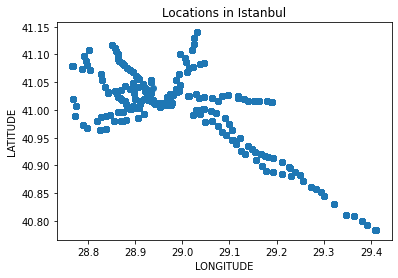

In [ ]:
# Scatter plot with day against tip
plt.scatter( df['LONGITUDE'], df['LATITUDE'])
 
# Adding Title to the Plot
plt.title("Locations in Istanbul")
 
# Setting the X and Y labels
plt.xlabel('LONGITUDE')
plt.ylabel('LATITUDE')

 
plt.show()

As we mention above, passage count and passenger count have high correlation between them. This is the graphic of their correlation.

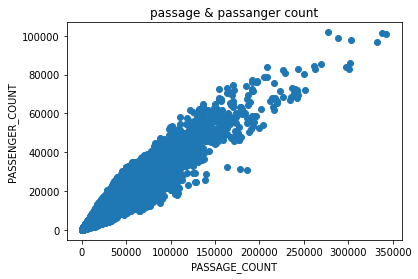

In [ ]:
# Scatter plot passage count & passenger count
plt.scatter(df['PASSAGE_COUNT'], df['PASSENGER_COUNT'])
 
# Adding Title to the Plot
plt.title("passage & passanger count")
 
# Setting the X and Y labels
plt.xlabel('PASSAGE_COUNT')
plt.ylabel('PASSENGER_COUNT')
 
plt.show()

1 is represent Male and 2 is represents Female. Male passengers were more than female passengers.

   GENDER  PASSENGER_COUNT
0       1      6499.921834
1       2      4512.635546


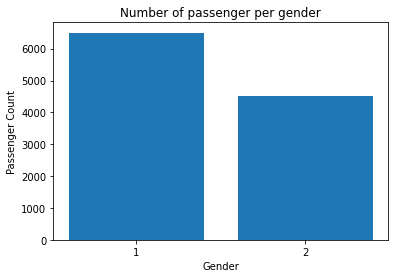

In [ ]:
gender_df = df[['PASSENGER_COUNT', 'GENDER']].groupby(['GENDER'],as_index=False).mean()
print(gender_df)
gender_df['GENDER'] = gender_df['GENDER'].astype('string')


plt.bar(gender_df['GENDER'], gender_df['PASSENGER_COUNT'])
plt.title("Number of passenger per gender")
plt.xlabel('Gender')
plt.ylabel('Passenger Count')
plt.show()

In 2019 there were more passengers than 2020.

   transaction_Year  PASSENGER_COUNT
0              2019      6845.180945
1              2020      4223.778345


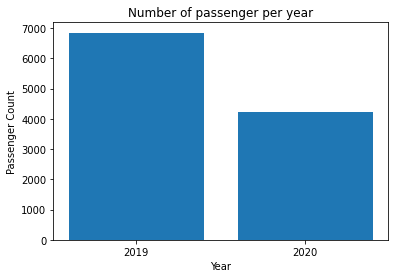

In [ ]:
year_df = df[['PASSENGER_COUNT', 'transaction_Year']].groupby(['transaction_Year'],as_index=False).mean()
print(year_df)
year_df['transaction_Year'] = year_df['transaction_Year'].astype('string')


plt.bar(year_df['transaction_Year'], year_df['PASSENGER_COUNT'])
plt.title("Number of passenger per year")
plt.xlabel('Year')
plt.ylabel('Passenger Count')
plt.show()

In january and february, there were much more passengers compared to other months.

    transaction_Month  PASSENGER_COUNT
0                   1      7311.949915
1                   2      7065.756986
2                   3      5836.874871
3                   4      3694.193813
4                   5      3746.142207
5                   6      4936.444182
6                   7      5393.830159
7                   8      5331.899249
8                   9      5906.101660
9                  10      6113.468590
10                 11      5745.921967
11                 12      5160.257004


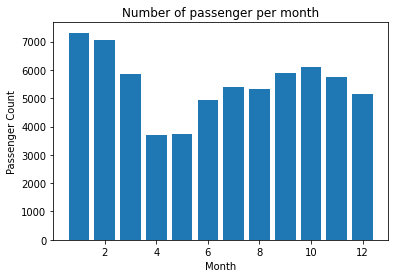

In [ ]:
passanger_df = df[['PASSENGER_COUNT', 'transaction_Month']].groupby(['transaction_Month'],as_index=False).mean()
print(passanger_df)

plt.bar(passanger_df['transaction_Month'], passanger_df['PASSENGER_COUNT'])
plt.title("Number of passenger per month")
plt.xlabel('Month')
plt.ylabel('Passenger Count')
plt.show()

After we manipulate the data, the new graphics are below.

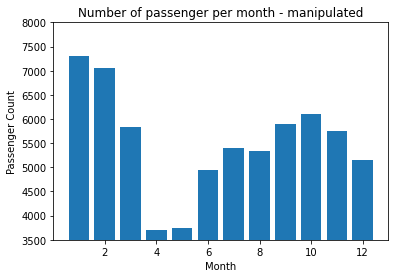

In [ ]:
plt.bar(passanger_df['transaction_Month'], passanger_df['PASSENGER_COUNT'])
plt.title("Number of passenger per month - manipulated")
plt.xlabel('Month')
plt.ylabel('Passenger Count')
plt.ylim([3500, 8000])
plt.show()

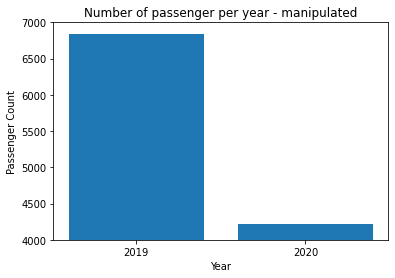

In [ ]:
plt.bar(year_df['transaction_Year'], year_df['PASSENGER_COUNT'])
plt.title("Number of passenger per year - manipulated")
plt.xlabel('Year')
plt.ylabel('Passenger Count')
plt.ylim([4000, 7000])
plt.show()


The second dataset is about theater plays in Istanbul. It has play data. Therefore it corresponds to temporal data.

In [ ]:
df2 = pd.read_csv('theater_play.csv', encoding= 'unicode_escape')
print(df2.columns)

Index(['PLAY_DATE', 'PLAY_NAME', 'THEATER_NAME', 'PLAY_CATEGORY',
       'IS_GUEST_PLAY', 'PLAY_TYPE', 'LONGITUDE', 'LATITUDE',
       'NUMBER_OF_AUDIENCE'],
      dtype='object')


In [ ]:
print(df2.describe())

       IS_GUEST_PLAY     LONGITUDE      LATITUDE  NUMBER_OF_AUDIENCE
count   27298.000000  27298.000000  27298.000000        27298.000000
mean        0.041615     28.986390     41.040191           66.653601
std         0.199711      0.060749      0.030050          167.922210
min         0.000000     28.876578     40.991770            1.000000
25%         0.000000     28.956194     41.017064           11.000000
50%         0.000000     28.988829     41.025025           32.000000
75%         0.000000     29.023408     41.057846           67.000000
max         1.000000     29.104798     41.097745         3588.000000


In [ ]:
corr_matrix = df2.corr()
print(corr_matrix)

                    IS_GUEST_PLAY  LONGITUDE  LATITUDE  NUMBER_OF_AUDIENCE
IS_GUEST_PLAY            1.000000   0.087178 -0.101731           -0.057694
LONGITUDE                0.087178   1.000000 -0.600624            0.053991
LATITUDE                -0.101731  -0.600624  1.000000           -0.029968
NUMBER_OF_AUDIENCE      -0.057694   0.053991 -0.029968            1.000000


There is no correlation between guest play and number of audience

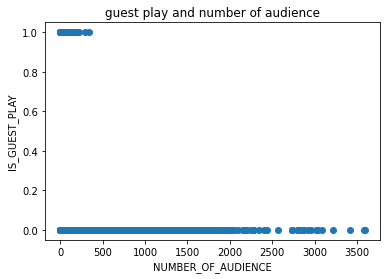

In [ ]:
# Scatter plot of guest play and number of audience
plt.scatter(df2['NUMBER_OF_AUDIENCE'], df2['IS_GUEST_PLAY'])
 
# Adding Title to the Plot
plt.title("guest play and number of audience")
 
# Setting the X and Y labels
plt.ylabel('IS_GUEST_PLAY')
plt.xlabel('NUMBER_OF_AUDIENCE')
 
plt.show()

It describes non-numeric attributes

In [ ]:
df2.describe(include=['O'])

,PLAY_DATE,PLAY_NAME,THEATER_NAME,PLAY_CATEGORY,PLAY_TYPE
count,27298,27298,27297,27298,27298
unique,770,350,77,3,2
top,2019-12-17,KARINCALAR - BÄ°R SAVAÅ VARDI,KaÄÄ±thane Sadabad Sahnesi,YetiÅkin,Yerli
freq,127,1025,3553,17349,15720


<ipython-input-69-90d1256993c2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_df["PLAY_DATE"] = pd.to_datetime(date_df["PLAY_DATE"])
<ipython-input-69-90d1256993c2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_df["PLAY_DATE"] = date_df["PLAY_DATE"].dt.strftime('%Y-%m')


   PLAY_DATE  NUMBER_OF_AUDIENCE
0    2017-09               28961
1    2017-10               89186
2    2017-11               79423
3    2017-12               93005
4    2018-01               97346
5    2018-02               77300
6    2018-03               86419
7    2018-04               28734
8    2018-05               20510
9    2018-06                2242
10   2018-09               38847
11   2018-10               72522
12   2018-11               84313
13   2018-12               91307
14   2019-01              105082
15   2019-02               89767
16   2019-03               90397
17   2019-04               52292
18   2019-05               31573
19   2019-06                3959
20   2019-09               48693
21   2019-10               89967
22   2019-11              113494
23   2019-12              148595
24   2020-01               71531
25   2020-02               53351
26   2020-03               10993
27   2020-09                7109
28   2020-10                7546
29   2020-

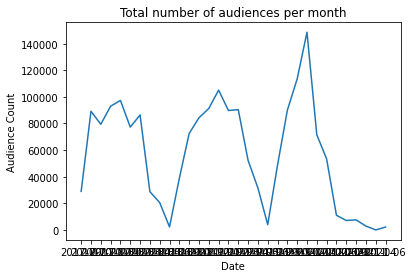

In [ ]:
from datetime import datetime as dt
date_df = df2[['PLAY_DATE', 'NUMBER_OF_AUDIENCE']]

date_df["PLAY_DATE"] = pd.to_datetime(date_df["PLAY_DATE"])
date_df["PLAY_DATE"] = date_df["PLAY_DATE"].dt.strftime('%Y-%m')

date_df = date_df.groupby(['PLAY_DATE'],as_index=False).sum()
print(date_df)

plt.plot(date_df['PLAY_DATE'], date_df['NUMBER_OF_AUDIENCE'])
plt.title("Total number of audiences per month")
plt.xlabel('Date')
plt.ylabel('Audience Count')
plt.show()

<ipython-input-63-4bad00a41600>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_df["PLAY_DATE"] = pd.to_datetime(date_df["PLAY_DATE"])
<ipython-input-63-4bad00a41600>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_df["PLAY_DATE"] = date_df["PLAY_DATE"].dt.strftime('%Y-%m')


   PLAY_DATE  NUMBER_OF_AUDIENCE
0    2017-09           90.221184
1    2017-10           99.095556
2    2017-11           78.949304
3    2017-12           76.484375
4    2018-01           68.074126
5    2018-02           72.108209
6    2018-03           68.207577
7    2018-04           33.924439
8    2018-05           44.012876
9    2018-06          124.555556
10   2018-09          112.600000
11   2018-10           81.120805
12   2018-11           82.096397
13   2018-12           87.041945
14   2019-01           72.872399
15   2019-02           84.051498
16   2019-03           81.659440
17   2019-04           43.038683
18   2019-05           41.110677
19   2019-06           59.089552
20   2019-09          110.414966
21   2019-10           89.252976
22   2019-11           84.131950
23   2019-12           67.237557
24   2020-01           31.263549
25   2020-02           43.730328
26   2020-03           47.180258
27   2020-09           22.425868
28   2020-10           15.819706
29   2020-

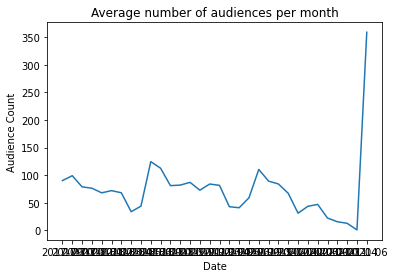

In [ ]:
from datetime import datetime as dt
date_df = df2[['PLAY_DATE', 'NUMBER_OF_AUDIENCE']]

date_df["PLAY_DATE"] = pd.to_datetime(date_df["PLAY_DATE"])
date_df["PLAY_DATE"] = date_df["PLAY_DATE"].dt.strftime('%Y-%m')

date_df = date_df.groupby(['PLAY_DATE'],as_index=False).mean()
print(date_df)

plt.plot(date_df['PLAY_DATE'], date_df['NUMBER_OF_AUDIENCE'])
plt.title("Average number of audiences per month")
plt.xlabel('Date')
plt.ylabel('Audience Count')
plt.show()

Movies that have most audience count.

                                         PLAY_NAME  NUMBER_OF_AUDIENCE
57                                   BÄ°ZÄ°M AÄ°LE               67036
346                           ÅAHANE ZÃÄÃRTLER               63911
29              BAK BÄ°ZÄ°M ÅARKIMIZI ÃALIYORLAR               55603
232                                      POLLYANNA               55313
119  HÄ°SSE-Ä° ÅAYÄ°A (BÄ°R EVLÄ°LÄ°K KOMEDÄ°SÄ°)               53396
141                 KARINCALAR - BÄ°R SAVAÅ VARDI               53071
67                               CÄ°BALÄ° KARAKOLU               52474
132                           KAHVEDE ÅENLÄ°K VAR               51722
214                         NORA - BÄ°R BEBEK EVÄ°               48346
276                                   TATLI KAÃIK               47298
31                                BEN ÃAÄIRMADIM               44293
51                          BÄ°R KÃMES HÄ°KAYESÄ°               44170
195                                      MATRUÅKA               43764
55    

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 158 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 156 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 135 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 158 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 156 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 135 missing from current font.
  font.set_text(s, 0, flags

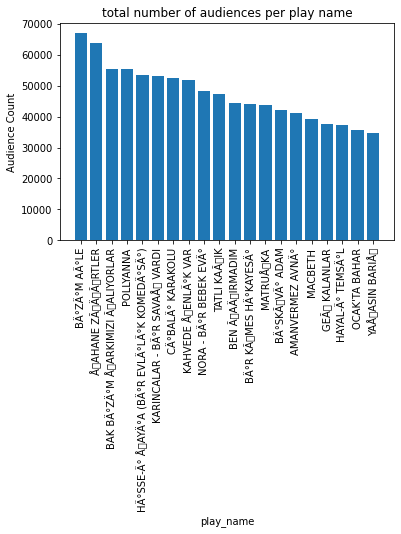

In [ ]:
name_df = df2[['PLAY_NAME', 'NUMBER_OF_AUDIENCE']].groupby(['PLAY_NAME'],as_index=False).sum().sort_values(by='NUMBER_OF_AUDIENCE', ascending=False)

top20 = name_df[0:20]
print(top20)

plt.bar(top20['PLAY_NAME'], top20['NUMBER_OF_AUDIENCE'])
plt.title("total number of audiences per play name")
plt.xlabel('play_name')
plt.ylabel('Audience Count')
plt.xticks(rotation=90)
plt.show()


Movies that have most audience count manipulated version.

                                         PLAY_NAME  NUMBER_OF_AUDIENCE
57                                   BÄ°ZÄ°M AÄ°LE               67036
346                           ÅAHANE ZÃÄÃRTLER               63911
29              BAK BÄ°ZÄ°M ÅARKIMIZI ÃALIYORLAR               55603
232                                      POLLYANNA               55313
119  HÄ°SSE-Ä° ÅAYÄ°A (BÄ°R EVLÄ°LÄ°K KOMEDÄ°SÄ°)               53396
141                 KARINCALAR - BÄ°R SAVAÅ VARDI               53071
67                               CÄ°BALÄ° KARAKOLU               52474
132                           KAHVEDE ÅENLÄ°K VAR               51722
214                         NORA - BÄ°R BEBEK EVÄ°               48346
276                                   TATLI KAÃIK               47298
31                                BEN ÃAÄIRMADIM               44293
51                          BÄ°R KÃMES HÄ°KAYESÄ°               44170
195                                      MATRUÅKA               43764
55    

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 158 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 156 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 135 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 158 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 156 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 135 missing from current font.
  font.set_text(s, 0, flags

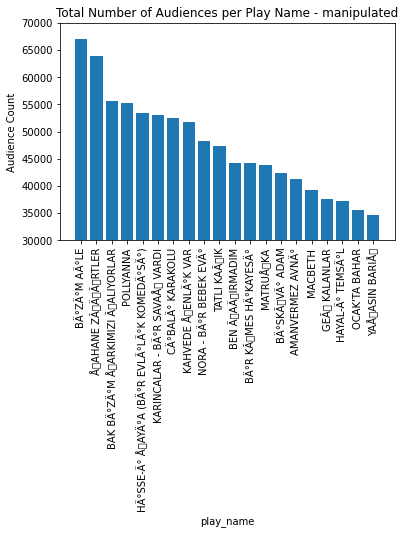

In [ ]:
name_df = df2[['PLAY_NAME', 'NUMBER_OF_AUDIENCE']].groupby(['PLAY_NAME'],as_index=False).sum().sort_values(by='NUMBER_OF_AUDIENCE', ascending=False)

top20 = name_df[0:20]
print(top20)

plt.bar(top20['PLAY_NAME'], top20['NUMBER_OF_AUDIENCE'])
plt.title("Total Number of Audiences per Play Name - manipulated")
plt.xlabel('play_name')
plt.ylabel('Audience Count')
plt.xticks(rotation=90)
plt.ylim([30000, 70000])
plt.show()
